# **Yelp Ratings**

In [1]:
# Import packages
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv("data/MSBA Exit_Yelp.csv")

# Preview the data
df.head()

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,postal_code,review_count,state,stars
0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...",922049,"Home Organization, Interior Design, Profession...",Portland,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '...",1,45.551736,-122.552248,97220,11,OR,5.0
1,"{'WiFi': ""u'free'"", 'RestaurantsGoodForGroups'...",492976,"Burgers, Restaurants",Portland,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-21:0'...",1,45.519562,-122.675040,97204,790,OR,4.0
2,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...",125987,"Home Services, Tree Services, Landscaping",Austin,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",1,30.296603,-97.970185,78738,6,TX,4.0
3,{'ByAppointmentOnly': 'True'},445542,"Chiropractors, Massage Therapy, Health & Medical",Portland,NaN,0,45.520668,-122.672014,97204,15,OR,5.0
4,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...",225939,"Apartments, Real Estate, Home Services",Orlando,"{'Monday': '9:0-18:0', 'Tuesday': '10:0-18:0',...",0,28.520020,-81.457009,32811,7,FL,4.5


In [3]:
# Shape of the dataset
df.shape

(120437, 12)

In [4]:
# Columns inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120437 entries, 0 to 120436
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   attributes    109193 non-null  object 
 1   business_id   120437 non-null  int64  
 2   categories    120351 non-null  object 
 3   city          120437 non-null  object 
 4   hours         99879 non-null   object 
 5   is_open       120437 non-null  int64  
 6   latitude      120437 non-null  float64
 7   longitude     120437 non-null  float64
 8   postal_code   120355 non-null  object 
 9   review_count  120437 non-null  int64  
 10  state         120437 non-null  object 
 11  stars         120437 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.0+ MB


## **Data Preparation for Visualization**

#### The Hour Column

In [3]:
# Function to evaluate closing status based on hours
def evaluate_closing_status(hours):
    if pd.isnull(hours):
        return "unknown"

    try:
        hours_dict = json.loads(hours.replace("'", '"'))
        closed_days = [day for day, time in hours_dict.items() if time == '0:0-0:0']
        
        if 'Sunday' in closed_days and len(closed_days) == 1:
            return "closed on sunday"
        elif 'Saturday' in closed_days and len(closed_days) == 1:
            return "closed on saturday"
        elif 'Saturday' in closed_days and 'Sunday' in closed_days:
            return "closed on week-ends"
        else:
            week_days_closed = [day for day in closed_days if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
            if week_days_closed:
                return f"closed on {len(week_days_closed)} week day(s)"
            return "open all week"
    except:
        return "unknown"

# Apply the function to the hours column
df['closing_status'] = df['hours'].apply(evaluate_closing_status)


In [4]:
# Display the resulting dataframe
df[['business_id', 'hours', 'closing_status']].head()

,business_id,hours,closing_status
0,922049,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '...",closed on 1 week day(s)
1,492976,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-21:0'...",open all week
2,125987,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",open all week
3,445542,NaN,unknown
4,225939,"{'Monday': '9:0-18:0', 'Tuesday': '10:0-18:0',...",open all week


#### The Category Column

In [8]:
import ast

# Function to convert stringified dictionary to actual dictionary
def parse_dict_string(dict_string):
    if pd.isna(dict_string):
        return {}
    return ast.literal_eval(dict_string)

# Apply the function to the column
df_parsed = df['attributes'].apply(parse_dict_string)

# Create a DataFrame from the parsed dictionaries, using pd.json_normalize to handle different keys across rows
df_expanded = pd.json_normalize(df_parsed)

# Concatenate the original DataFrame with the expanded DataFrame
df_final = pd.concat([df, df_expanded], axis=1)

# Drop the original 'BusinessAttributes' column if you no longer need it
df_final.drop(columns=['attributes'], inplace=True)

In [9]:
df_final.head()

,business_id,categories,city,hours,is_open,latitude,longitude,postal_code,review_count,state,...,Music,Smoking,AcceptsInsurance,BYOBCorkage,BYOB,Corkage,DietaryRestrictions,RestaurantsCounterService,Open24Hours,AgesAllowed
0,922049,"Home Organization, Interior Design, Profession...",Portland,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '...",1,45.551736,-122.552248,97220,11,OR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492976,"Burgers, Restaurants",Portland,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-21:0'...",1,45.519562,-122.675040,97204,790,OR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125987,"Home Services, Tree Services, Landscaping",Austin,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",1,30.296603,-97.970185,78738,6,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,445542,"Chiropractors, Massage Therapy, Health & Medical",Portland,NaN,0,45.520668,-122.672014,97204,15,OR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225939,"Apartments, Real Estate, Home Services",Orlando,"{'Monday': '9:0-18:0', 'Tuesday': '10:0-18:0',...",0,28.520020,-81.457009,32811,7,FL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_final.isnull().sum() / len(df_final) * 100

business_id                    0.000000
categories                     0.071407
city                           0.000000
hours                         17.069505
is_open                        0.000000
latitude                       0.000000
longitude                      0.000000
postal_code                    0.068085
review_count                   0.000000
state                          0.000000
stars                          0.000000
closing_status                 0.000000
ByAppointmentOnly             69.099197
BusinessAcceptsCreditCards    25.106902
BusinessAcceptsBitcoin        88.988434
WiFi                          63.255478
RestaurantsGoodForGroups      71.637454
GoodForKids                   64.544949
RestaurantsAttire             74.549349
BikeParking                   52.433222
NoiseLevel                    75.486769
OutdoorSeating                68.671588
RestaurantsPriceRange2        42.486113
RestaurantsDelivery           65.970590
Caters                        74.924649


In [12]:
df_final['BusinessAcceptsCreditCards'].value_counts()

BusinessAcceptsCreditCards
True     84809
False     5349
None        41
Name: count, dtype: int64

In [13]:
df_final['BusinessAcceptsCreditCards'].isnull().sum()

30238

In [14]:
df_final[['BusinessAcceptsCreditCards']]

,BusinessAcceptsCreditCards
0,True
1,True
2,True
3,NaN
4,False
...,...
120432,NaN
120433,False
120434,True
120435,True


#### The Attribute Column

<Axes: >

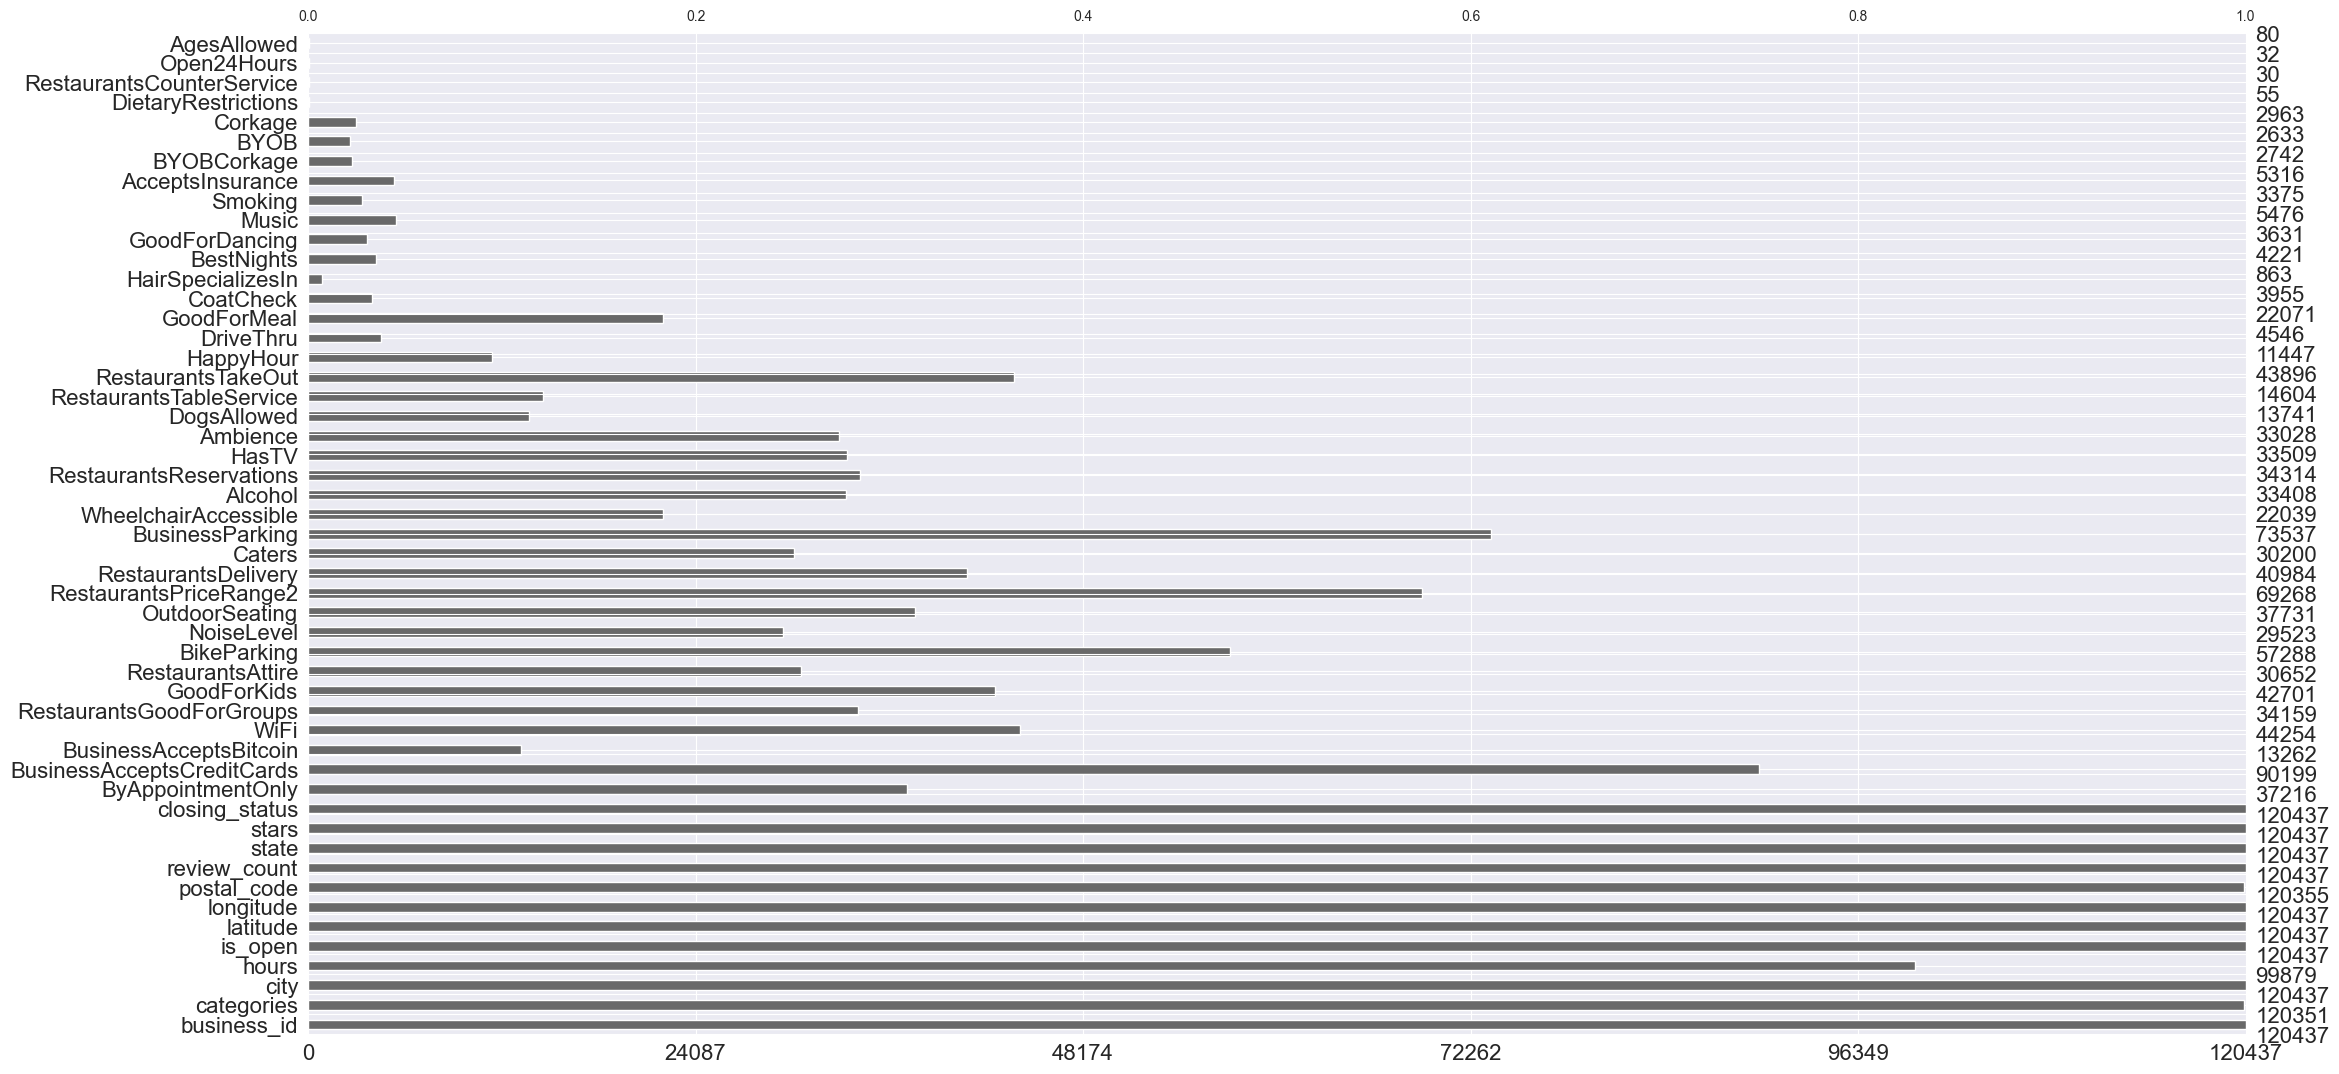

In [25]:
# Visualizing missingness
import missingno as msno

# Plot amount of missingness
msno.bar(df_final)

## Exploratory Data

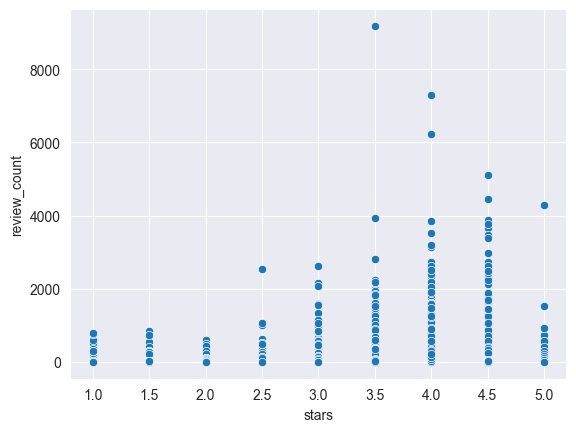

In [8]:
sns.scatterplot(df, x="stars", y="review_count")

plt.show()

## **Model Development**

In [4]:
df.isnull().sum() / df.shape[0] * 100

attributes       9.336001
business_id      0.000000
categories       0.071407
city             0.000000
hours           17.069505
is_open          0.000000
latitude         0.000000
longitude        0.000000
postal_code      0.068085
review_count     0.000000
state            0.000000
stars            0.000000
dtype: float64

In [3]:
df.shape[0]

120437